In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df['DAY'] = pd.to_datetime(df['DAY'])
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month
df.head()   

,DAY,PRECIP_QUANTITY,year,year_month,month
0,1892-01-01,1.94,1892,1892-01,1
1,1892-01-02,0.49,1892,1892-01,1
2,1892-01-03,0.00,1892,1892-01,1
3,1892-01-04,0.00,1892,1892-01,1
4,1892-01-05,0.87,1892,1892-01,1


In [8]:
#I want to regroup the years from september first to august 31st

tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
#I want a new colomn with 'year-1/year' to have the year of the season. For example 1892-1893 is the season of 1893
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()


,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


In [9]:
tp_monthly = df.groupby('year_month')['PRECIP_QUANTITY'].sum().reset_index()
tp_monthly['month']=tp_monthly['year_month'].dt.month
mean_mensual_precipitation = tp_monthly.groupby('month')['PRECIP_QUANTITY'].mean().reset_index()

#calculate the mean pecipitation of every month <9 of 2024 and from september on in 2023
first_part = df[(df['year'] == '2023') & (df['month'] > 8)].groupby('month')['PRECIP_QUANTITY'].sum().reset_index()
second_part = df[(df['year'] == '2024') & (df['month'] < 9)].groupby('month')['PRECIP_QUANTITY'].sum().reset_index()


mensual_precipitation_2024 = pd.concat([first_part,second_part],axis=0)
mean_mensual_precipitation

,month,PRECIP_QUANTITY
0,1,69.926692
1,2,57.106992
2,3,59.812857
3,4,54.296917
4,5,61.021654
5,6,67.876316
6,7,79.585489
7,8,74.038421
8,9,64.919023
9,10,70.800977


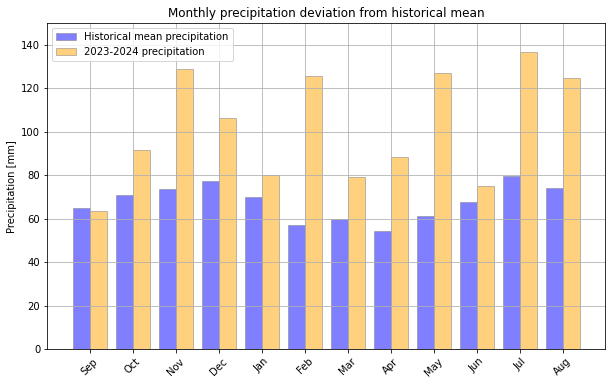

In [10]:
# Rearrange month names to start from September
month_names = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

# Create a mapping of months to new order starting from September
month_order_map = {9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec', 1: 'Jan', 2: 'Feb', 3: 'Mar', 
                   4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug'}

# Ensure 'month' column in both DataFrames is sorted according to this order
mean_mensual_precipitation['new_order'] = mean_mensual_precipitation['month'].map(month_order_map)
mensual_precipitation_2024['new_order'] = mensual_precipitation_2024['month'].map(month_order_map)

# Define the new order for sorting (from September to August)
month_order = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

# Sort the DataFrames based on the new order
mean_mensual_precipitation_sorted = mean_mensual_precipitation.set_index('new_order').loc[month_order].reset_index()
mensual_precipitation_2024_sorted = mensual_precipitation_2024.set_index('new_order').loc[month_order].reset_index()

# Define the width of the bars
bar_width = 0.4

# Define the positions of the bars
r1 = np.arange(len(mean_mensual_precipitation_sorted))
r2 = [x + bar_width for x in r1]

# Plot the barplot with reordered months
plt.figure(figsize=(10, 6))
plt.bar(r1, 
        mean_mensual_precipitation_sorted['PRECIP_QUANTITY'], 
        color='blue', width=bar_width, edgecolor='grey', label='Historical mean precipitation', alpha=0.5)
plt.bar(r2, 
        mensual_precipitation_2024_sorted['PRECIP_QUANTITY'], 
        color='orange', width=bar_width, edgecolor='grey', label='2023-2024 precipitation', alpha=0.5)

# Add labels and title
plt.ylabel('Precipitation [mm]')
plt.ylim(0, 150)
plt.title('Monthly precipitation deviation from historical mean')
plt.grid()
plt.xticks([r + bar_width / 2 for r in range(len(mean_mensual_precipitation_sorted))], month_names, rotation=45)
plt.legend(facecolor='white')
plt.show()